# Online Payments Fraud Detection
<img src="https://www.outseer.com/wp-content/uploads/Payment-Fraud-Detection_Overgraph.jpg">

What Is Payment Fraud Detection?

Payment fraud detection is the process of identifying attempts to make fraudulent transactions and preventing them from occurring


# Importing Necessary Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix




In [3]:
# Importing data set
df = pd.read_csv('PaymentData.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


# The Attributess include:
Column Name :-Description
    
step :-	represents a unit of time where 1 step equals 1 hour
    
type :-	type of online transaction
    
amount :-	the amount of the transaction
    
nameOrig :-	customer starting the transaction
    
oldbalanceOrg :-	balance before the transaction
    
newbalanceOrig :-	balance after the transaction
    
nameDest :-	recipient of the transaction
    
oldbalanceDest :-	initial balance of recipient before the transaction
    
newbalanceDest :- the new balance of recipient after the transaction
    
isFraud :-	fraud transaction
                    1 = If the customer have any froud.
                    0 = If the customer doesn't froud.

# Inspecting the Dataframe


In [4]:
# Let's see the head of our dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
# Let's check the dimensions of the dataframe
df.shape

(15065, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15065 entries, 0 to 15064
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            15065 non-null  int64  
 1   type            15065 non-null  object 
 2   amount          15065 non-null  float64
 3   nameOrig        15065 non-null  object 
 4   oldbalanceOrg   15065 non-null  float64
 5   newbalanceOrig  15065 non-null  float64
 6   nameDest        15065 non-null  object 
 7   oldbalanceDest  15065 non-null  float64
 8   newbalanceDest  15065 non-null  float64
 9   isFraud         15065 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# let's look at the statistical aspects of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,15065.0,8.270362e+00,1.383837e+01,1.00,3.0,7.00,7.00,95.0
amount,15065.0,1.887926e+05,6.680910e+05,2.39,4962.0,15051.54,148792.10,10000000.0
oldbalanceOrg,15065.0,8.316750e+05,2.046472e+06,0.00,172.0,22673.00,207181.00,19900000.0
newbalanceOrig,15065.0,7.607621e+05,2.011002e+06,0.00,0.0,3883.96,99565.64,13000000.0
oldbalanceDest,15065.0,8.133532e+05,2.479673e+06,0.00,0.0,0.00,255089.02,33000000.0
newbalanceDest,15065.0,1.135320e+06,3.094292e+06,0.00,0.0,0.00,323253.31,34600000.0
isFraud,15065.0,7.580485e-02,2.646944e-01,0.00,0.0,0.00,0.00,1.0


In [9]:
df['isFraud'].value_counts()

0    13923
1     1142
Name: isFraud, dtype: int64

In [10]:
obj_cols = df.select_dtypes(include='object').columns
obj_cols

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

# Data Visualization

In [11]:
# Let’s count the columns with different datatypes like Category, Integer, Float.
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 0
Float variables: 5


<AxesSubplot:xlabel='type', ylabel='count'>

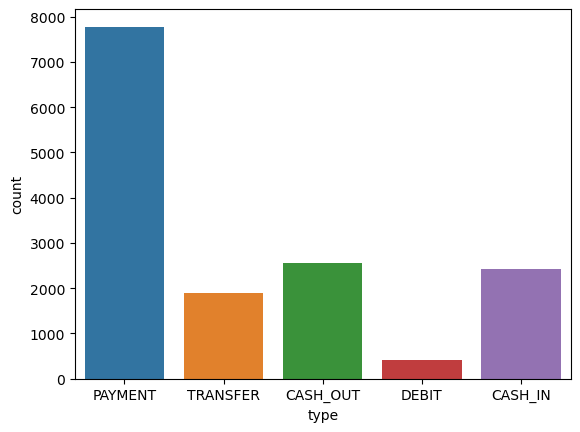

In [12]:
sns.countplot(x='type', data=df)

<AxesSubplot:xlabel='type', ylabel='amount'>

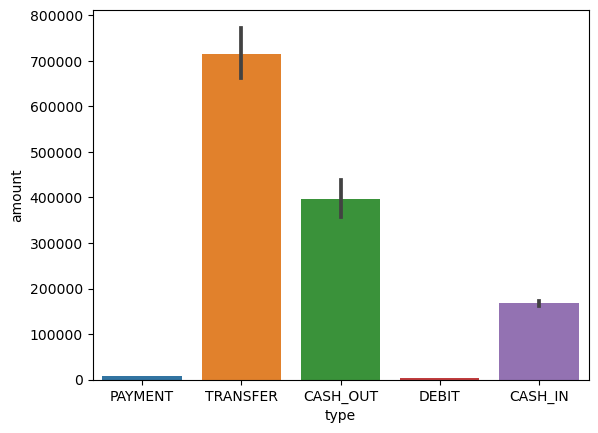

In [13]:
sns.barplot(x='type', y='amount', data=df)

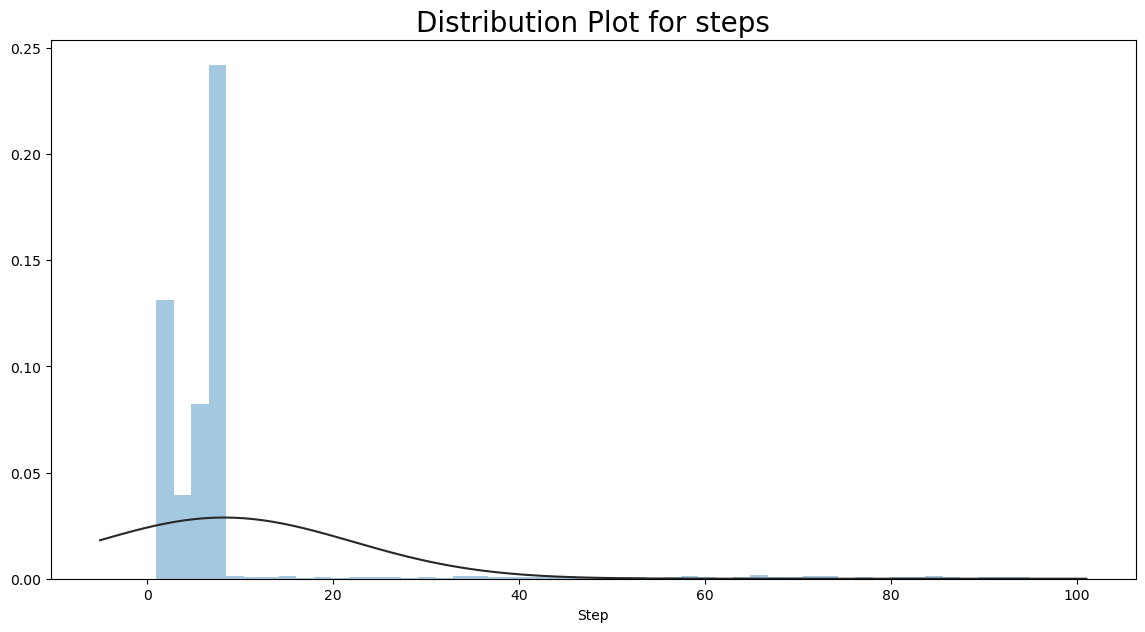

In [14]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

<AxesSubplot:>

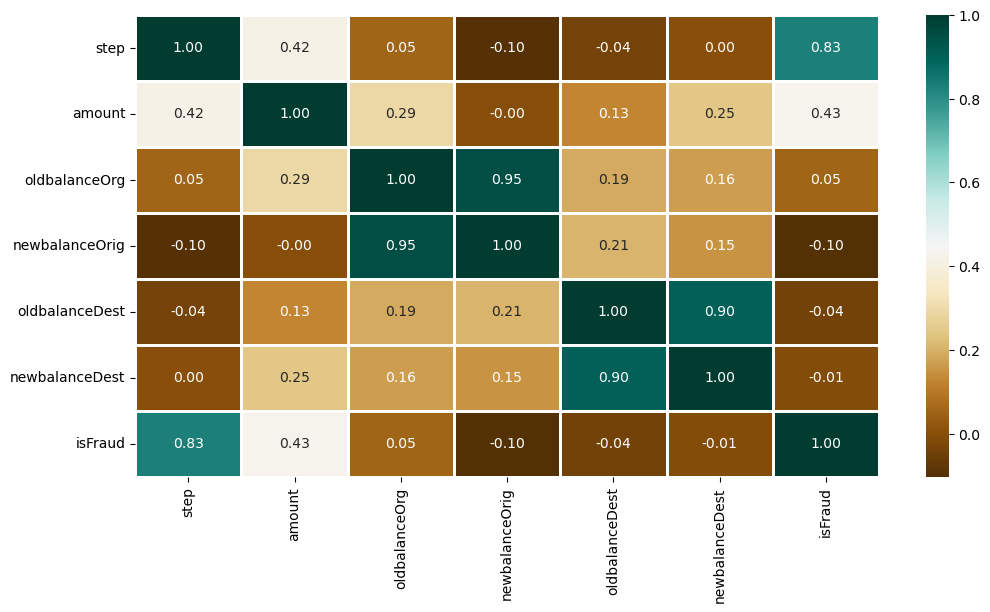

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

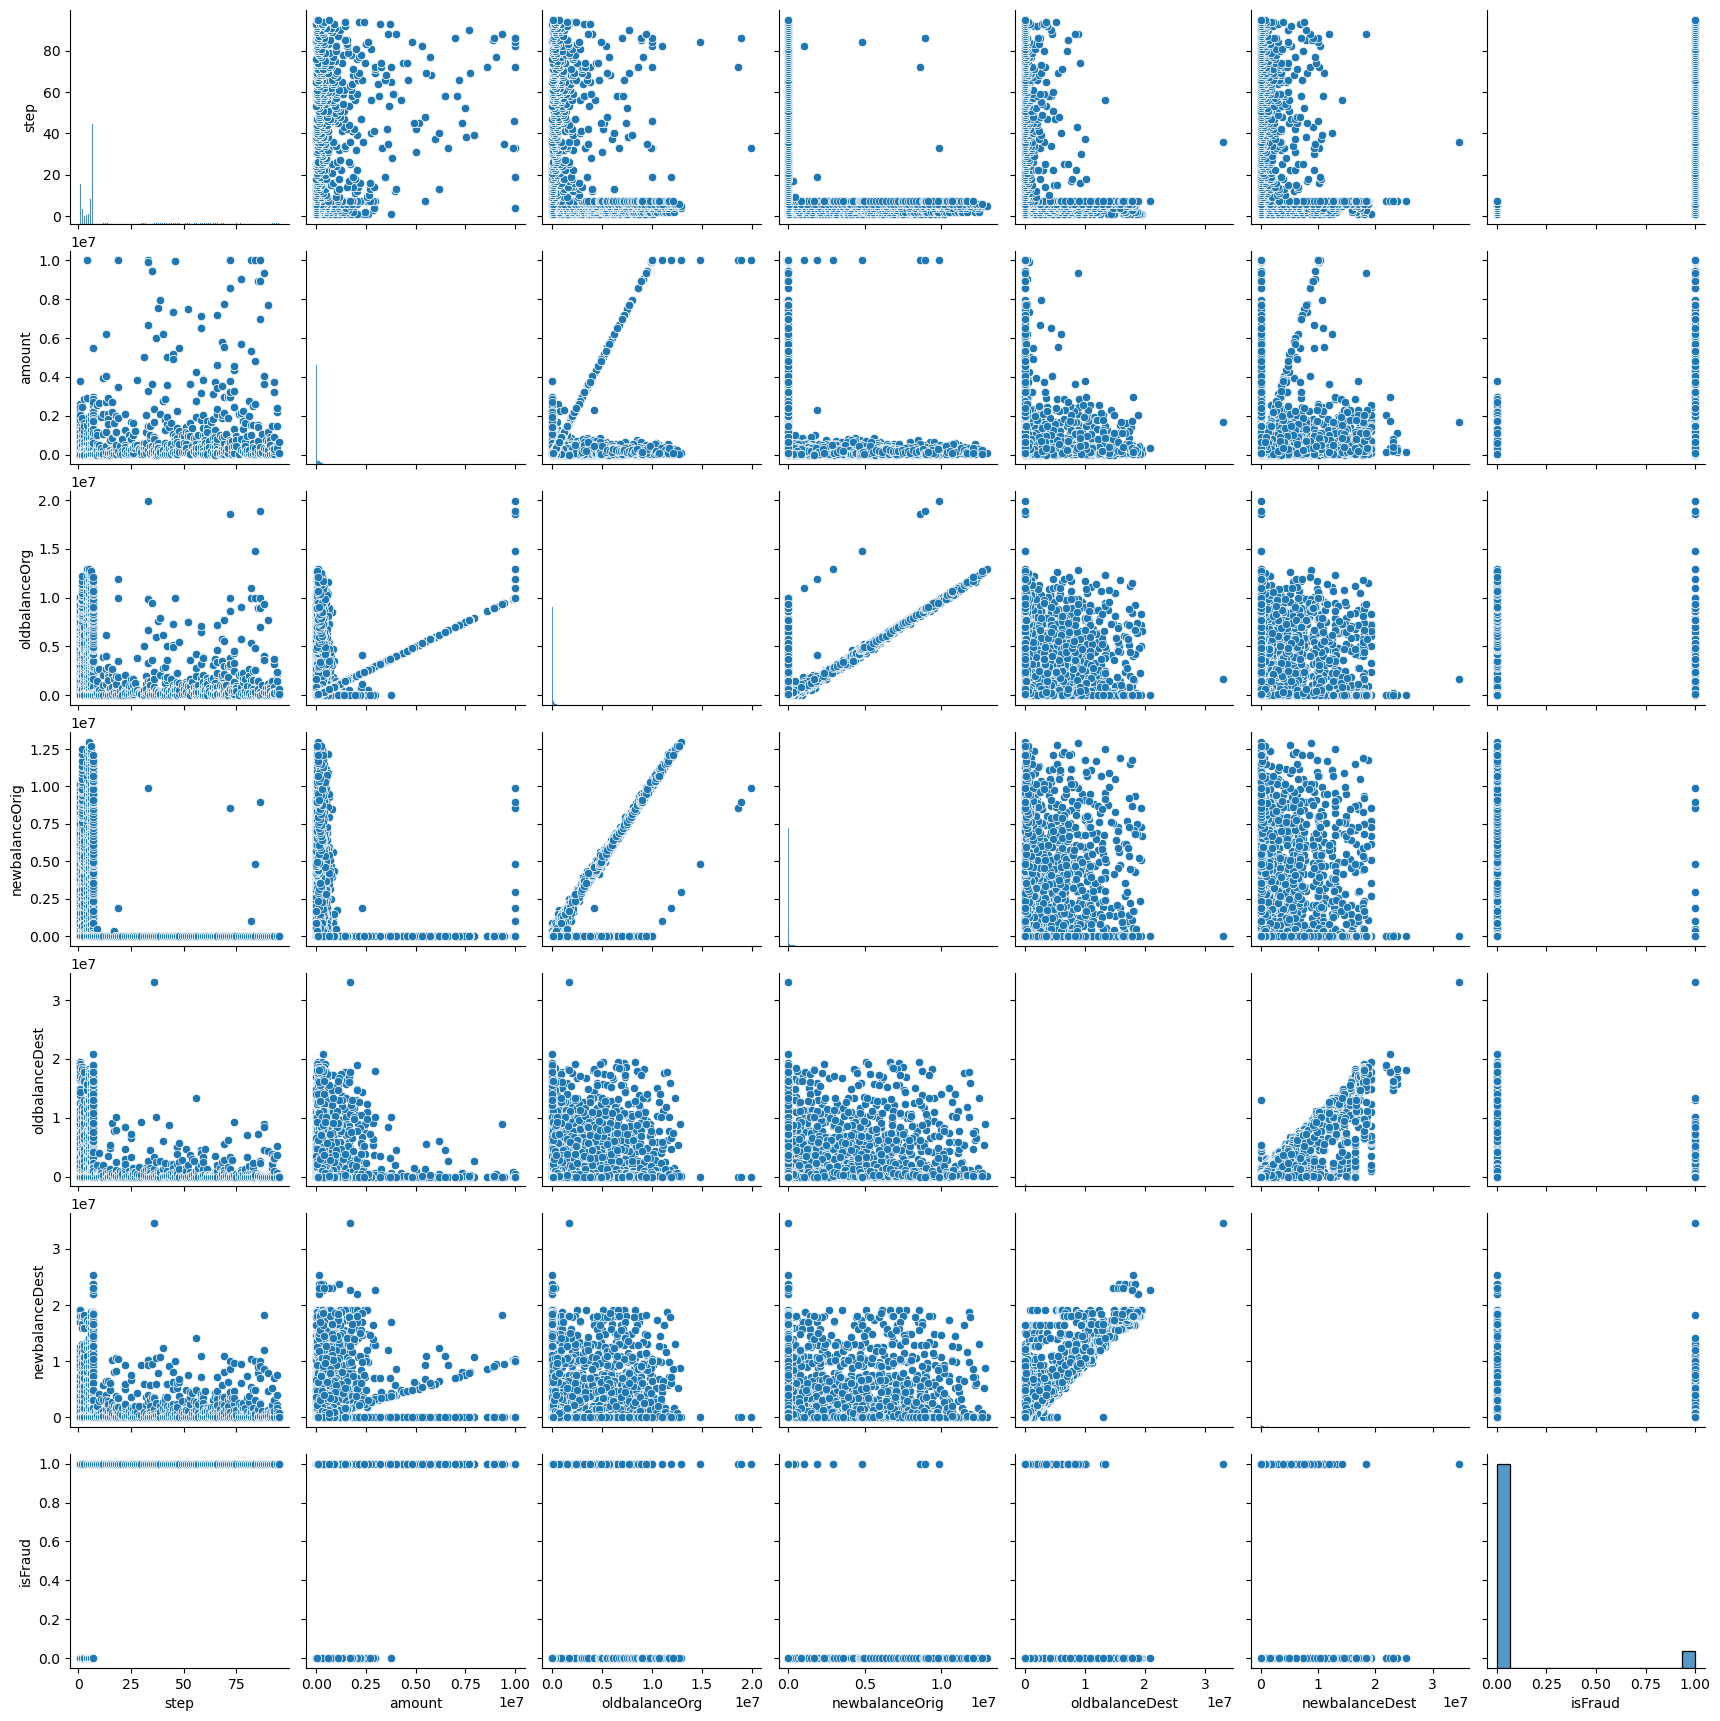

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
# checking the different types of steps involved in transactions

x = df['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 27


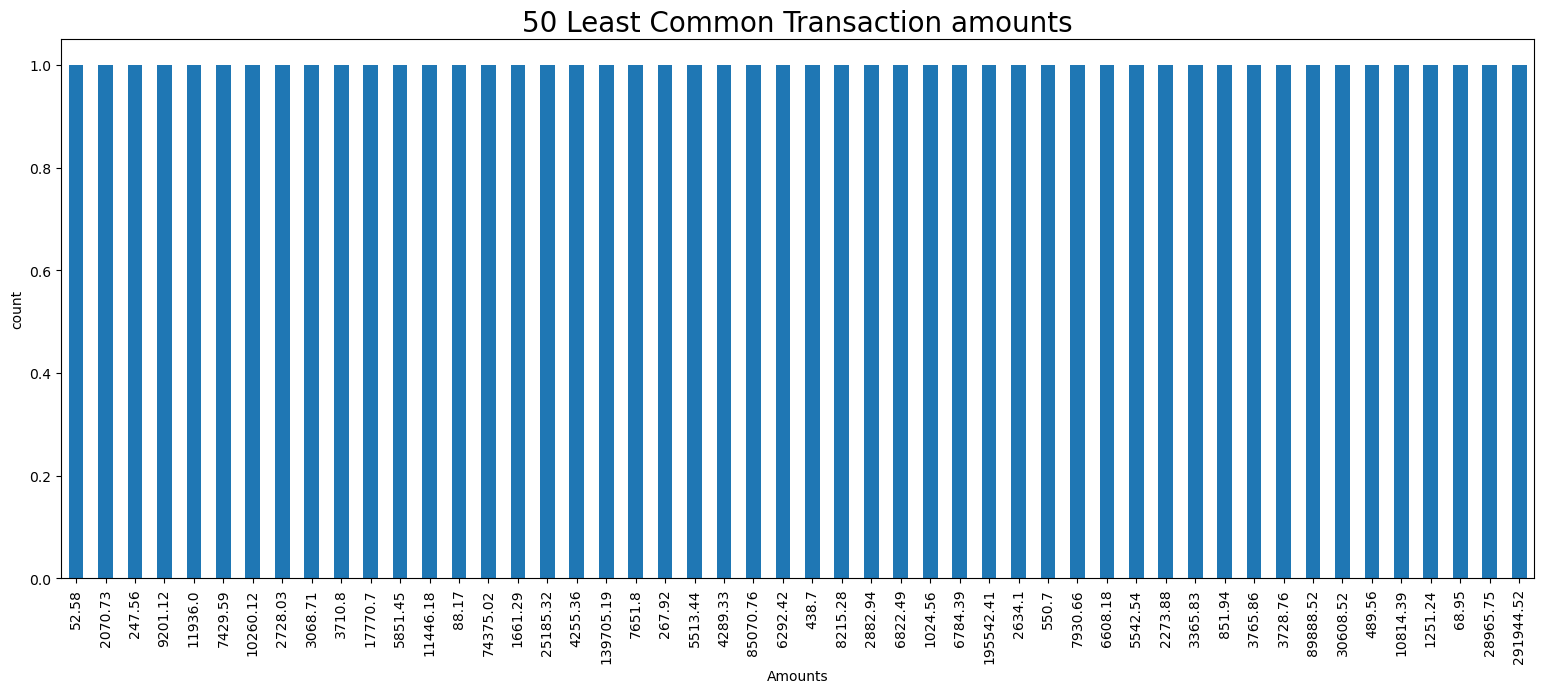

In [18]:

# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

df['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

class 0: (13923, 10)
class 1: (1142, 10)
total values of 1 and 0: 0    13923
1    13923
Name: isFraud, dtype: int64


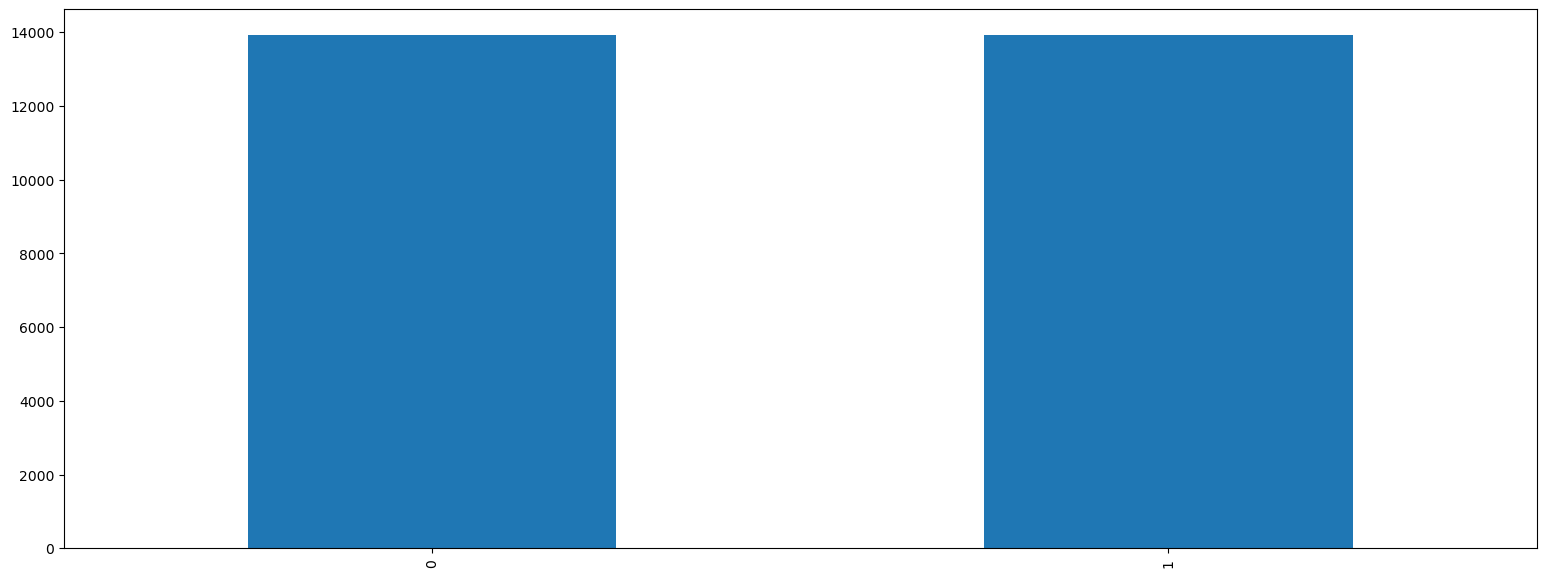

In [19]:
class_count_0, class_count_1 = df.isFraud.value_counts()
# Separate class
class_0 = df[df.isFraud  == 0]
class_1 = df[df.isFraud  == 1]

print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
    
class_1_over = class_1.sample(class_count_0, replace=True)
df = pd.concat([class_0,class_1_over], axis=0)

print("total values of 1 and 0:",df.isFraud.value_counts())

df.isFraud.value_counts().plot(kind='bar')
plt.show()

# Data Preprocessing
This step includes the following : 

Encoding of Type column
Dropping irrelevant columns like nameOrig, nameDest
Data Splitting

In [20]:
type_new = pd.get_dummies(df['type'], drop_first=True)
data_new = pd.concat([df, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,0,1,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,0,1,0


In [21]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [22]:
X.shape, y.shape

((27846, 10), (27846,))

# Test-Train Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,train_size=0.7, test_size=0.3, random_state=100)

In [25]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19492, 10), (8354, 10), (19492,), (8354,))

# Model Training
As the prediction is a classification problem so the models we will be using are :

LogisticRegression :  It predicts that the probability of a given data belongs to the particular category or not.

XGBClassifier : It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

SVC : SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

RandomForestClassifier : Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.
Let’s import the modules of the relevant models. 

# LogisticRegression
<img src = "https://editor.analyticsvidhya.com/uploads/59440overfitting%20(1).gif">

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:

lr = LogisticRegression()

In [28]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
log = accuracy_score(y_test, y_pred_logreg)

In [32]:
log

0.9127364136940388

In [33]:
#Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [34]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
print(logistic_confusion_matrix)

[[3645  569]
 [ 160 3980]]


In [35]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4214
           1       0.87      0.96      0.92      4140

    accuracy                           0.91      8354
   macro avg       0.92      0.91      0.91      8354
weighted avg       0.92      0.91      0.91      8354



<AxesSubplot:>

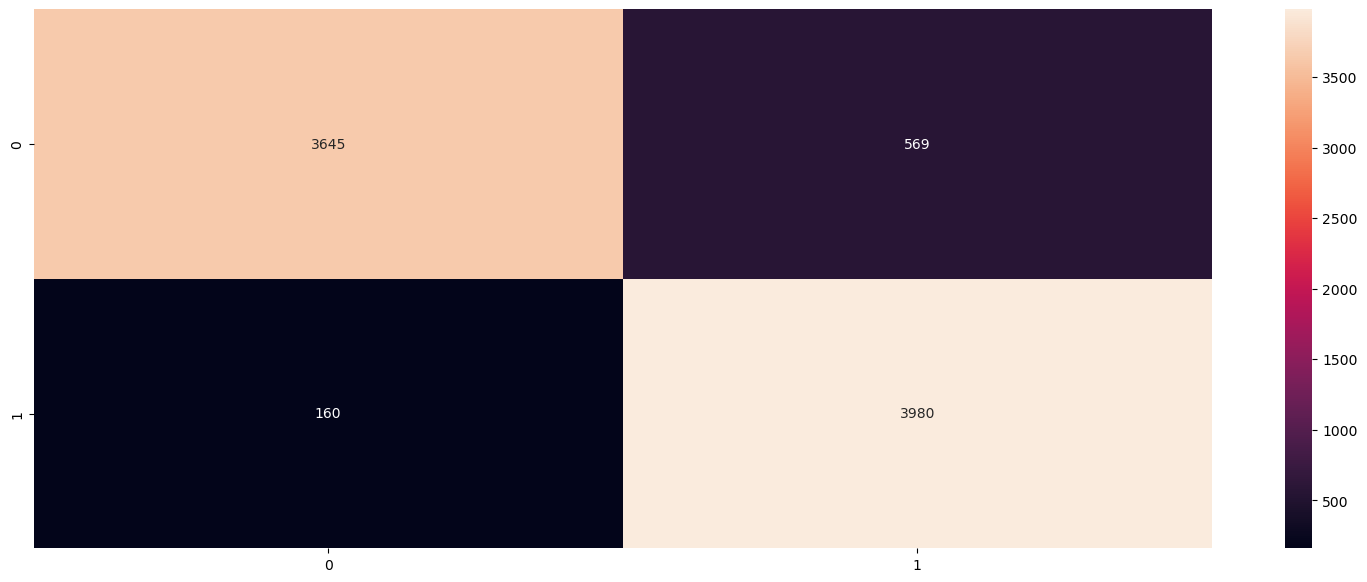

In [36]:
sns.heatmap(confusion_matrix(y_test,y_pred_logreg), annot = True, fmt = "d")

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test,y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[3645  569]
 [ 160 3980]]
Accuracy: [0.91273641]
Sensitivity : [0.95795007]
Specificity : [0.87491756]
Precision: [0.8649739]
Recall: [0.95795007]
F-score: [0.90909091]
AUC: 0.9131632767700948
ROC curve:


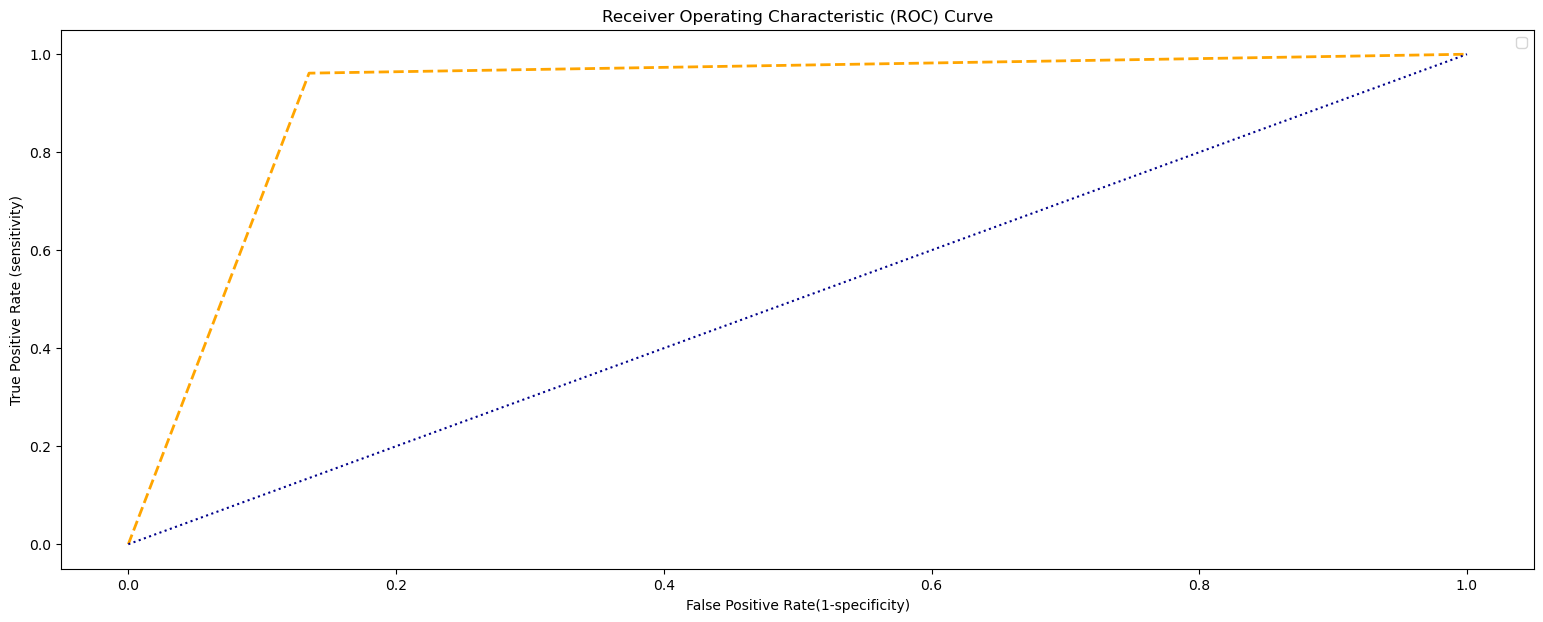

In [39]:
get_summary(y_test, y_pred_logreg)

# XGBClassifier

In [40]:
from xgboost import XGBClassifier
import xgboost as xgb

In [41]:
xgb = XGBClassifier()

In [42]:
# Training data is used for model building
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
# Testing data is used for prediction
y_pred_XGB = xgb.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
xgbc = accuracy_score(y_test,y_pred_XGB)

In [46]:
xgbc

0.9995211874551113

In [47]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [48]:
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       1.00      1.00      1.00      4140

    accuracy                           1.00      8354
   macro avg       1.00      1.00      1.00      8354
weighted avg       1.00      1.00      1.00      8354



In [49]:
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_XGB)
print(logistic_confusion_matrix)

[[3645  569]
 [ 160 3980]]


<AxesSubplot:>

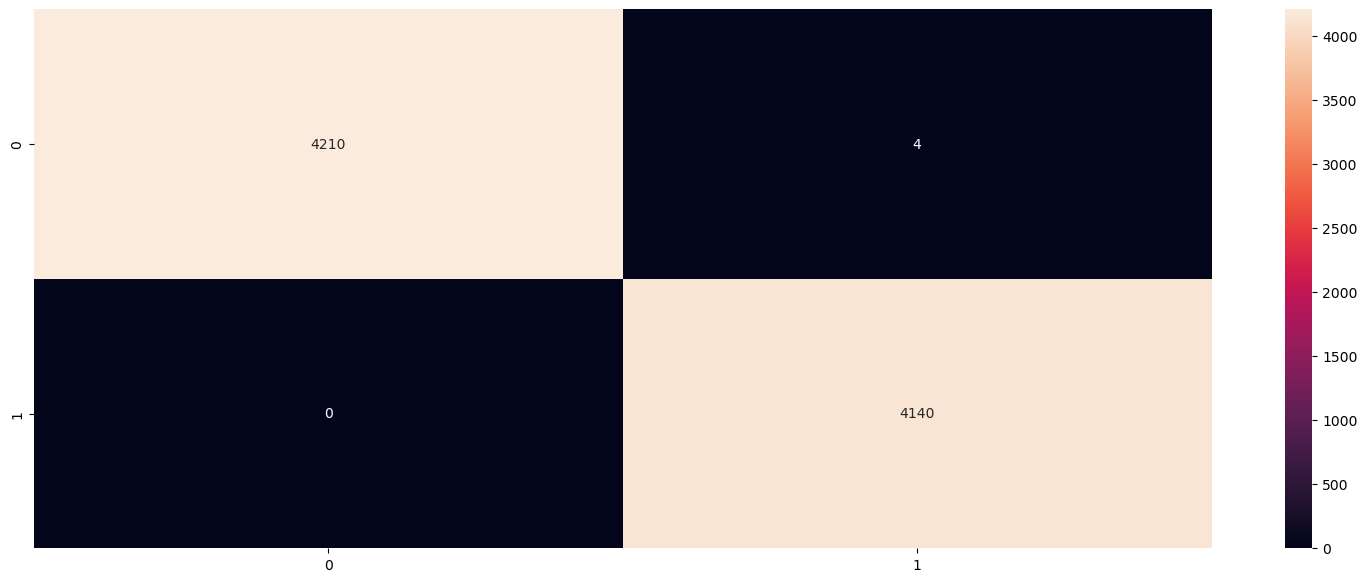

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred_XGB), annot = True, fmt = "d")

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

In [52]:
# Function For XGBClassifier Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_XGB):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_XGB)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_XGB)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_XGB)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[4210    4]
 [   0 4140]]
Accuracy: [0.99952119]
Sensitivity : [1.]
Specificity : [0.99903475]
Precision: [0.99905078]
Recall: [1.]
F-score: [0.99952517]
AUC: 0.9995253915519696
ROC curve:


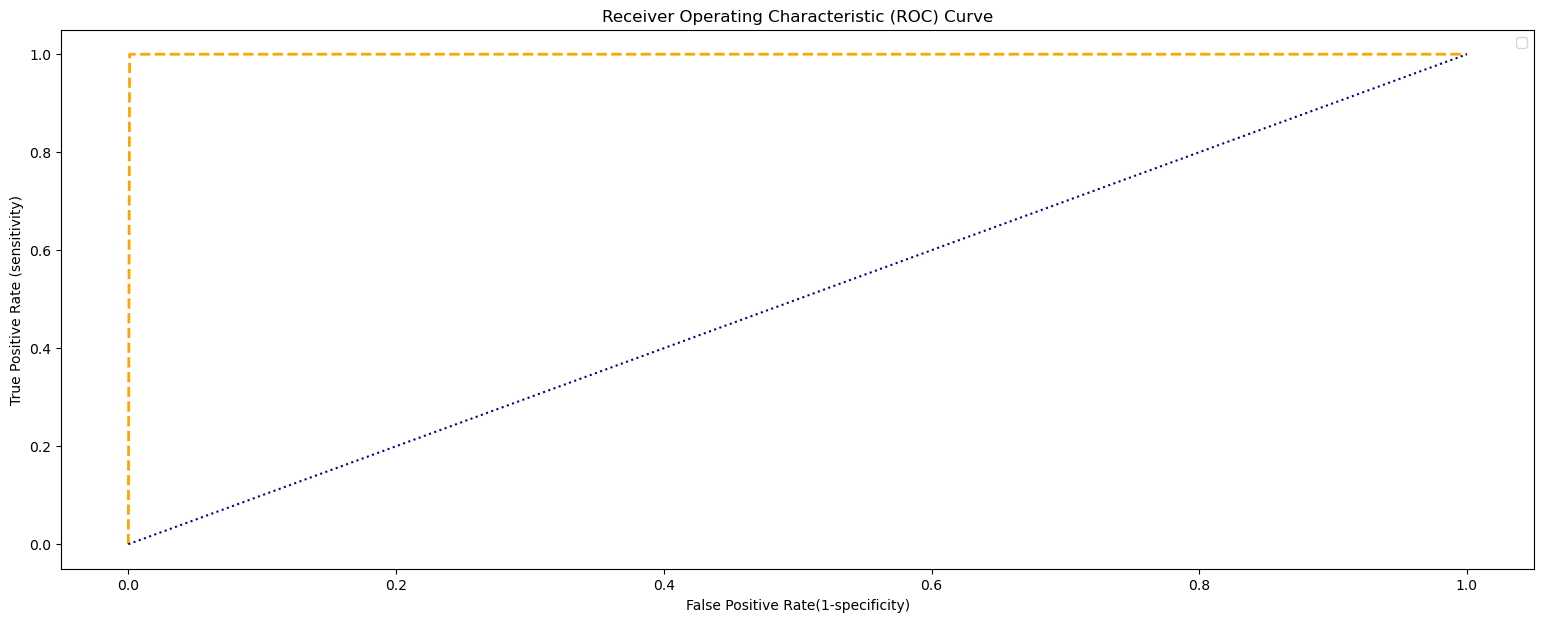

In [53]:
get_summary(y_test, y_pred_XGB)

# Support Vector Machine (SVM)
<img src = "https://www.newtechdojo.com/wp-content/uploads/2020/06/ezgif.com-optimize.gif">

In [54]:
from sklearn.svm import SVC

In [55]:
svc = SVC()

In [56]:
svc.fit(X_train, y_train)

SVC()

In [57]:
y_pred_svc = svc.predict(X_test)

In [58]:
svm = accuracy_score(y_test, y_pred_svc)

In [59]:
svm

0.8361264065118507

In [60]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[4144,   70],
       [1299, 2841]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      4214
           1       0.98      0.69      0.81      4140

    accuracy                           0.84      8354
   macro avg       0.87      0.83      0.83      8354
weighted avg       0.87      0.84      0.83      8354



<AxesSubplot:>

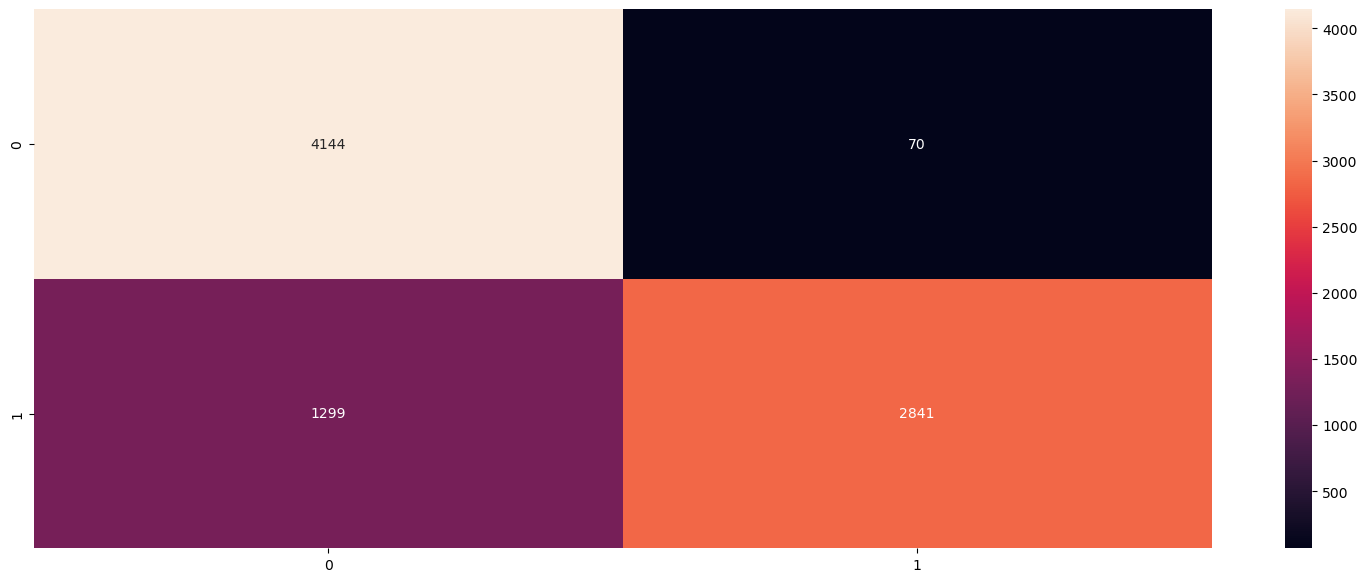

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot = True, fmt = "d")

In [63]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_svc):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_svc)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_svc)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
    plot_roc_curve(fpr, tpr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[4144   70]
 [1299 2841]]
Accuracy: [0.83612641]
Sensitivity : [0.76134485]
Specificity : [0.97595328]
Precision: [0.9833887]
Recall: [0.76134485]
F-score: [0.85823755]
AUC: 0.834810294188454
ROC curve:


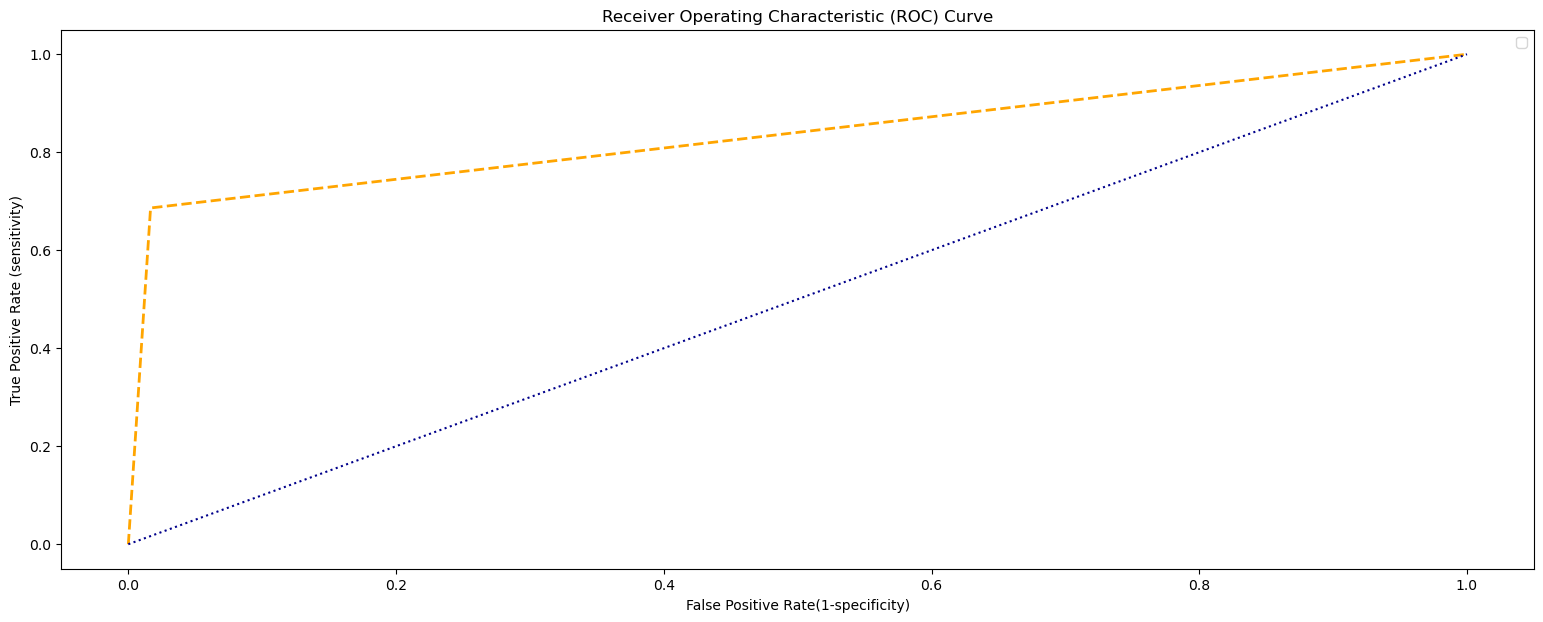

In [64]:
get_summary(y_test, y_pred_svc)


# K - Nearest Neighbour
<img src = "https://www.cloudyml.com/wp-content/uploads/2022/06/3eee0b_cc71f7fc3ba144479ca73110b0989f95_mv2.gif">

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn = knn.predict(X_test)

In [69]:
kn =accuracy_score(y_test, y_pred_knn)

In [70]:
kn

0.9798898731146756

In [71]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[4049,  165],
       [   3, 4137]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4214
           1       0.96      1.00      0.98      4140

    accuracy                           0.98      8354
   macro avg       0.98      0.98      0.98      8354
weighted avg       0.98      0.98      0.98      8354



<AxesSubplot:>

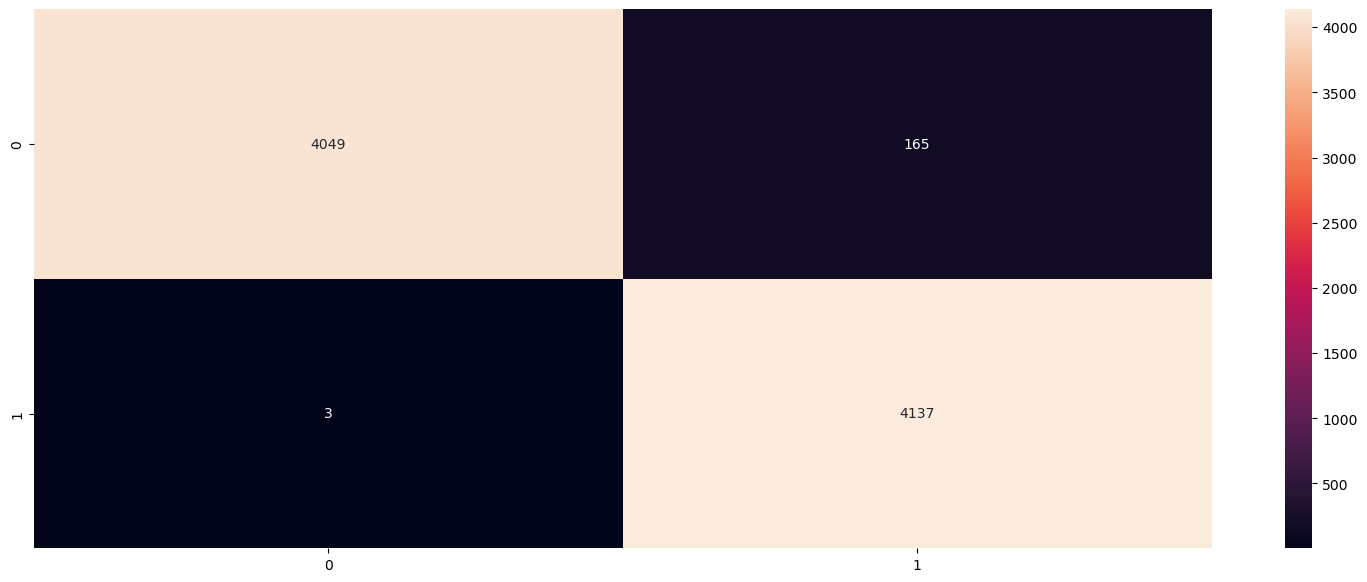

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot = True, fmt = "d")

In [74]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_knn):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_knn)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_knn)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[4049  165]
 [   3 4137]]
Accuracy: [0.97988987]
Sensitivity : [0.99925962]
Specificity : [0.96164575]
Precision: [0.9608448]
Recall: [0.99925962]
F-score: [0.97967578]
AUC: 0.9800600826781674
ROC curve:


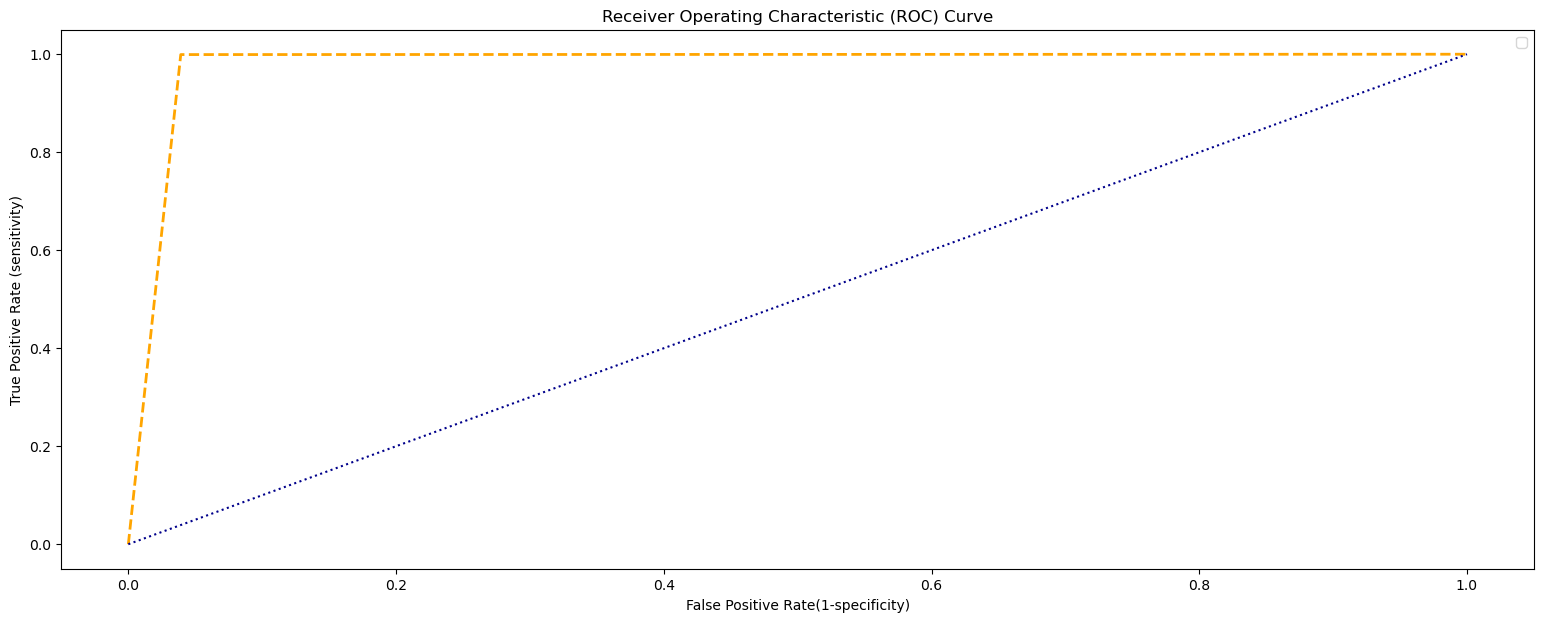

In [75]:
get_summary(y_test, y_pred_knn)

# Decision Tree

<img src="https://miro.medium.com/max/600/0*oLeswCbrUfNEUwAz.gif">




In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier()

In [78]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
y_pred_dtree = dtree.predict(X_test)

In [80]:
dt = accuracy_score(y_test, y_pred_dtree)

In [81]:
dt

0.9991620780464449

In [82]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
print(dtree_confusion_matrix)

[[4207    7]
 [   0 4140]]


In [83]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       1.00      1.00      1.00      4140

    accuracy                           1.00      8354
   macro avg       1.00      1.00      1.00      8354
weighted avg       1.00      1.00      1.00      8354



<AxesSubplot:>

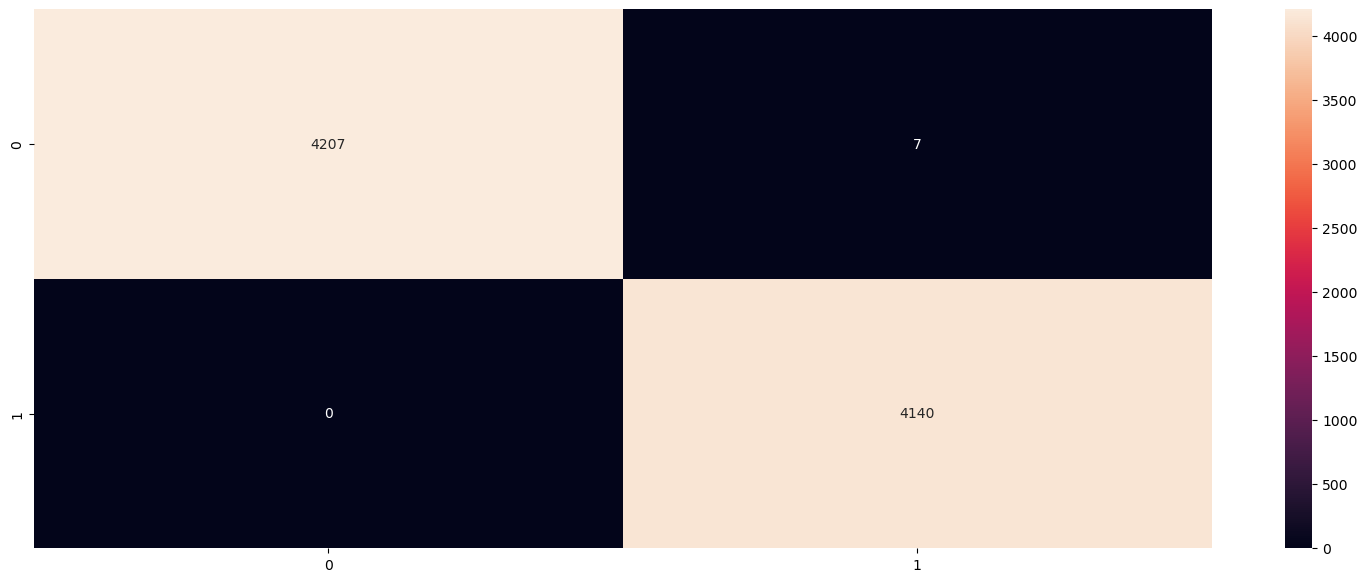

In [84]:
sns.heatmap(confusion_matrix(y_test,y_pred_dtree), annot = True, fmt = "d")

In [85]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_dtree):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_dtree)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_dtree)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtree)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[4207    7]
 [   0 4140]]
Accuracy: [0.99916208]
Sensitivity : [1.]
Specificity : [0.99831203]
Precision: [0.99833887]
Recall: [1.]
F-score: [0.99916874]
AUC: 0.9991694352159469
ROC curve:


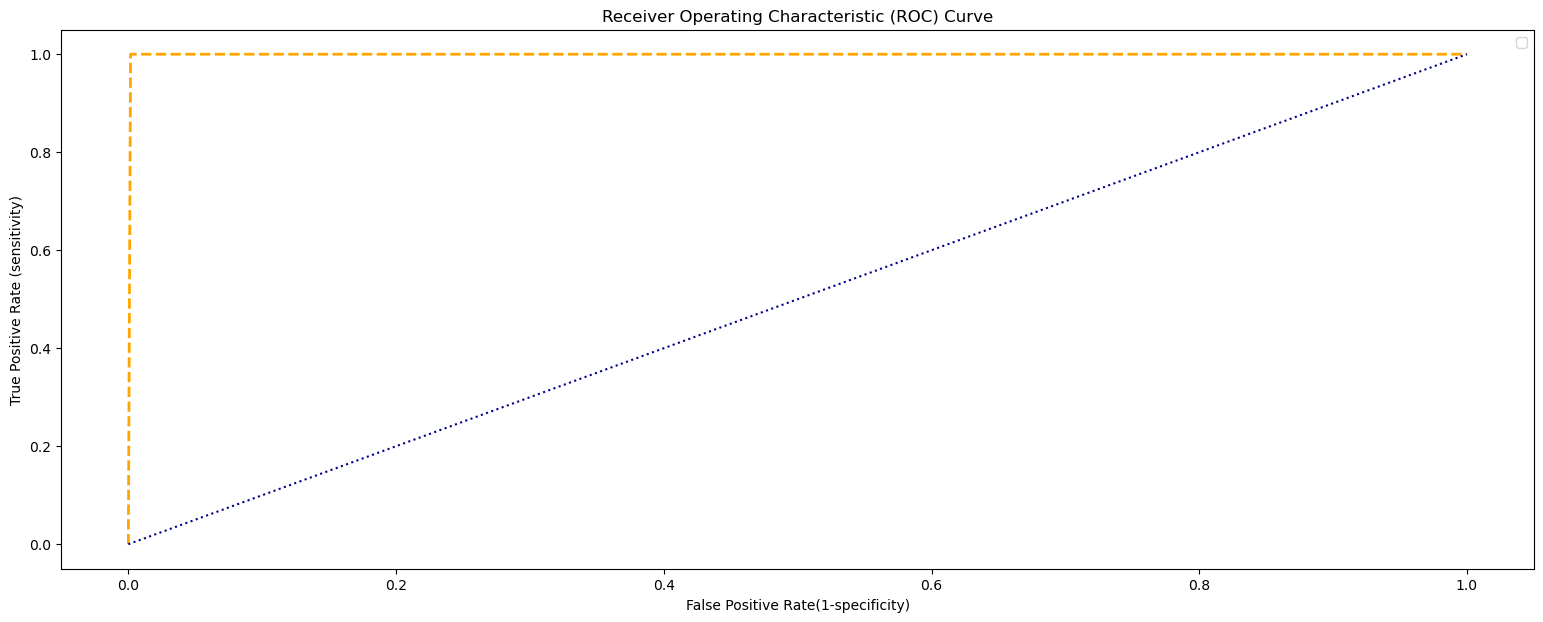

In [86]:
get_summary(y_test, y_pred_dtree)

# Random Forest
<img src = "https://media.tenor.com/SQx6NxzbMpwAAAAM/forest-sun-rays.gif">


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier()

In [89]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred_rfc = rfc.predict(X_test)

In [91]:
rf = accuracy_score(y_test, y_pred_rfc)

In [92]:
rf

1.0

In [93]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[4214,    0],
       [   0, 4140]], dtype=int64)

In [94]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4214
           1       1.00      1.00      1.00      4140

    accuracy                           1.00      8354
   macro avg       1.00      1.00      1.00      8354
weighted avg       1.00      1.00      1.00      8354



<AxesSubplot:>

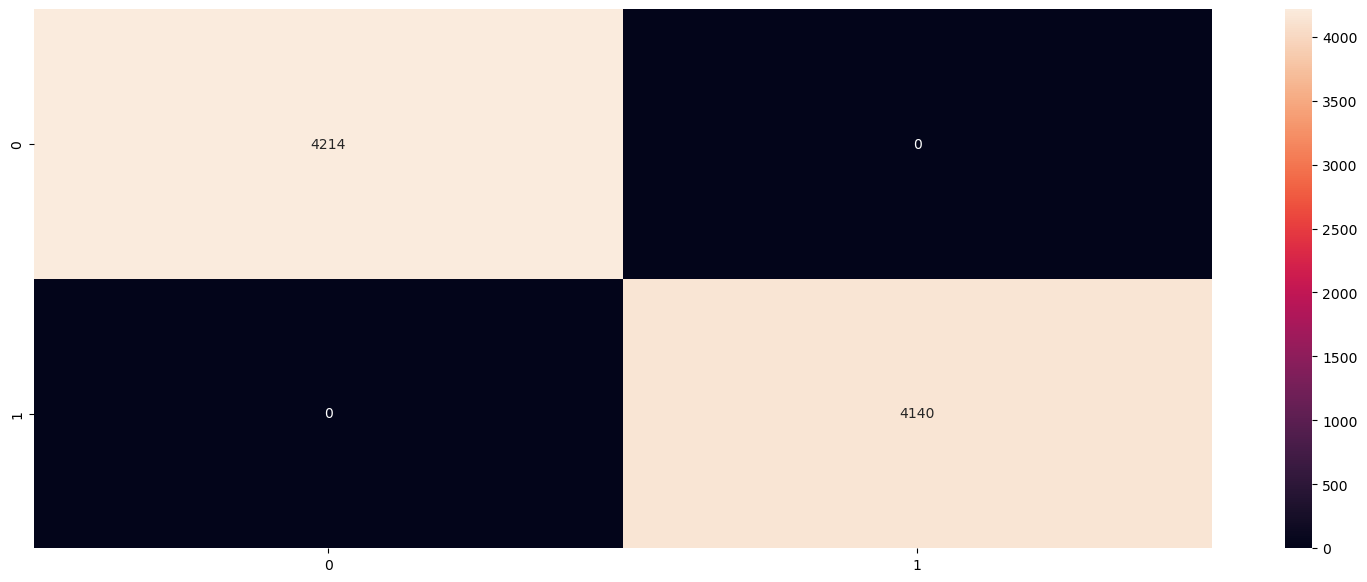

In [95]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot = True, fmt = "d")

In [96]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_rfc):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_rfc)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_rfc)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[4214    0]
 [   0 4140]]
Accuracy: [1.]
Sensitivity : [1.]
Specificity : [1.]
Precision: [1.]
Recall: [1.]
F-score: [1.]
AUC: 1.0
ROC curve:


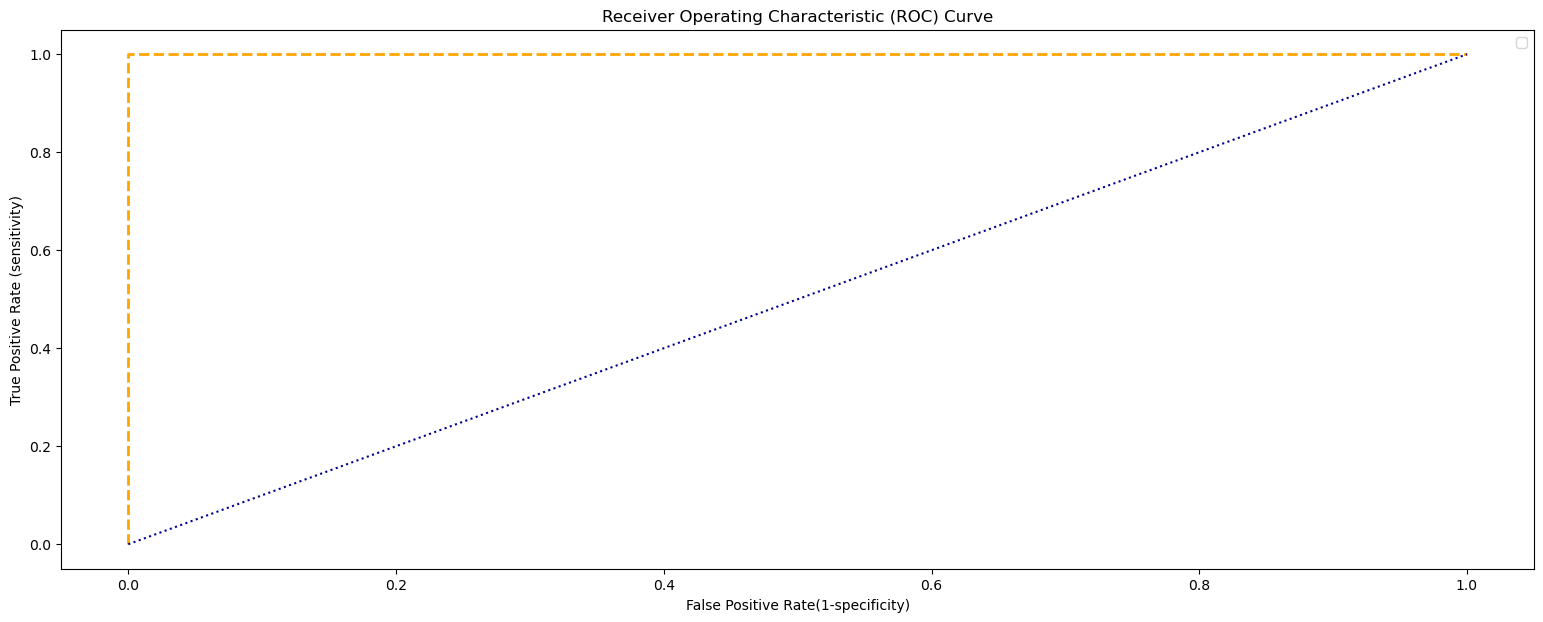

In [97]:
get_summary(y_test, y_pred_rfc)

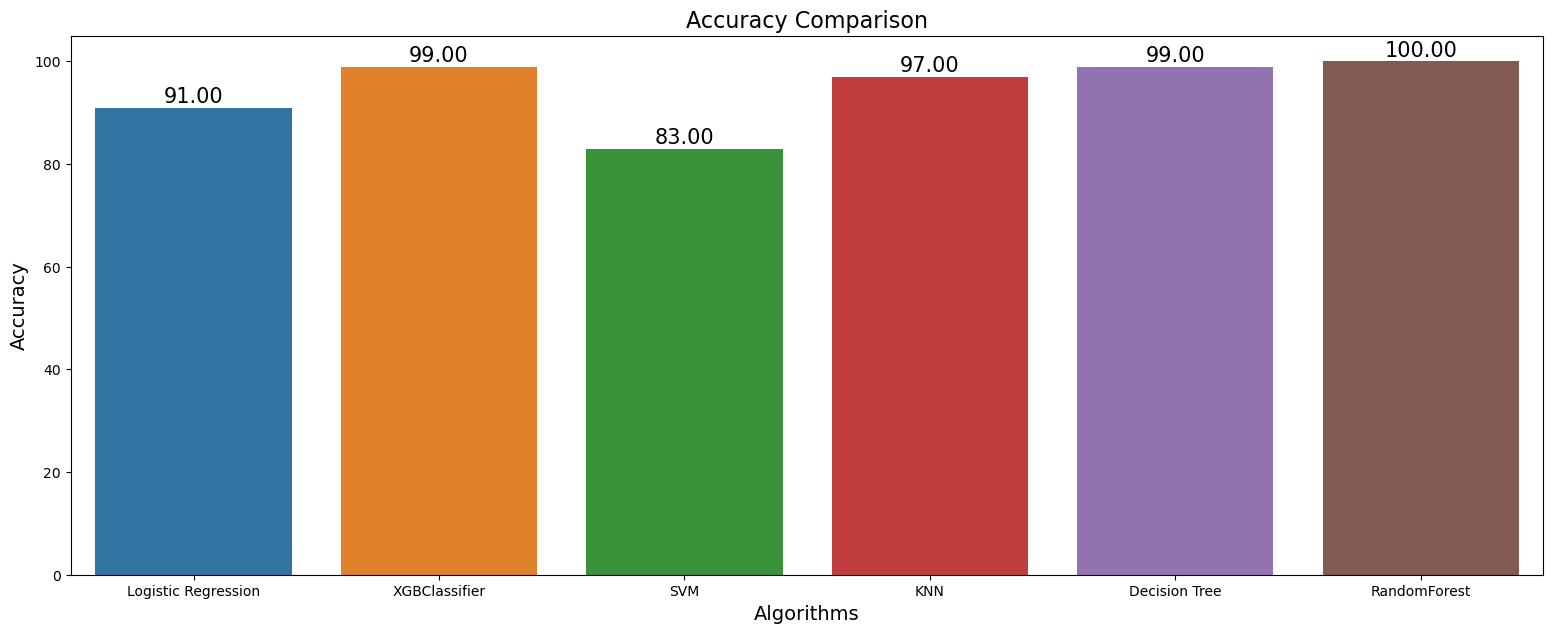

In [100]:
lx = ['Logistic Regression','XGBClassifier',"SVM",'KNN','Decision Tree','RandomForest']
ly = [91,99,83,97,99,100]
plots = sns.barplot(x=lx,y=ly)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Algorithms", size=14)
 
# Setting the label for y-axis
plt.ylabel("Accuracy", size=14)
 
# Setting the title for the graph
plt.title("Accuracy Comparison",size=16)
 
# Finally showing the plot
plt.show()

In [99]:
print("LogisticRegression : -",log)
print("XGBClassifier: -",xgbc)
print("suport vector machine:-",svm)
print("KNeighborsClassifier :-",kn)
print("Decision Tree :-",dt)
print("RandomForest :-",rf)

LogisticRegression : - 0.9127364136940388
XGBClassifier: - 0.9995211874551113
suport vector machine:- 0.8361264065118507
KNeighborsClassifier :- 0.9798898731146756
Decision Tree :- 0.9991620780464449
RandomForest :- 1.0
